<a href="https://colab.research.google.com/github/kaisarfardin6620/Breast-Cancer-Survival-Prediction-using-Machine-Learning./blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Breast_Cancer.csv')

In [ ]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [ ]:
df.shape

(4024, 16)

In [ ]:
df.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [ ]:
df.select_dtypes(include=np.number).columns

Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months'],
      dtype='object')

In [ ]:
df.select_dtypes(include=object).columns

Index(['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status', 'Status'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

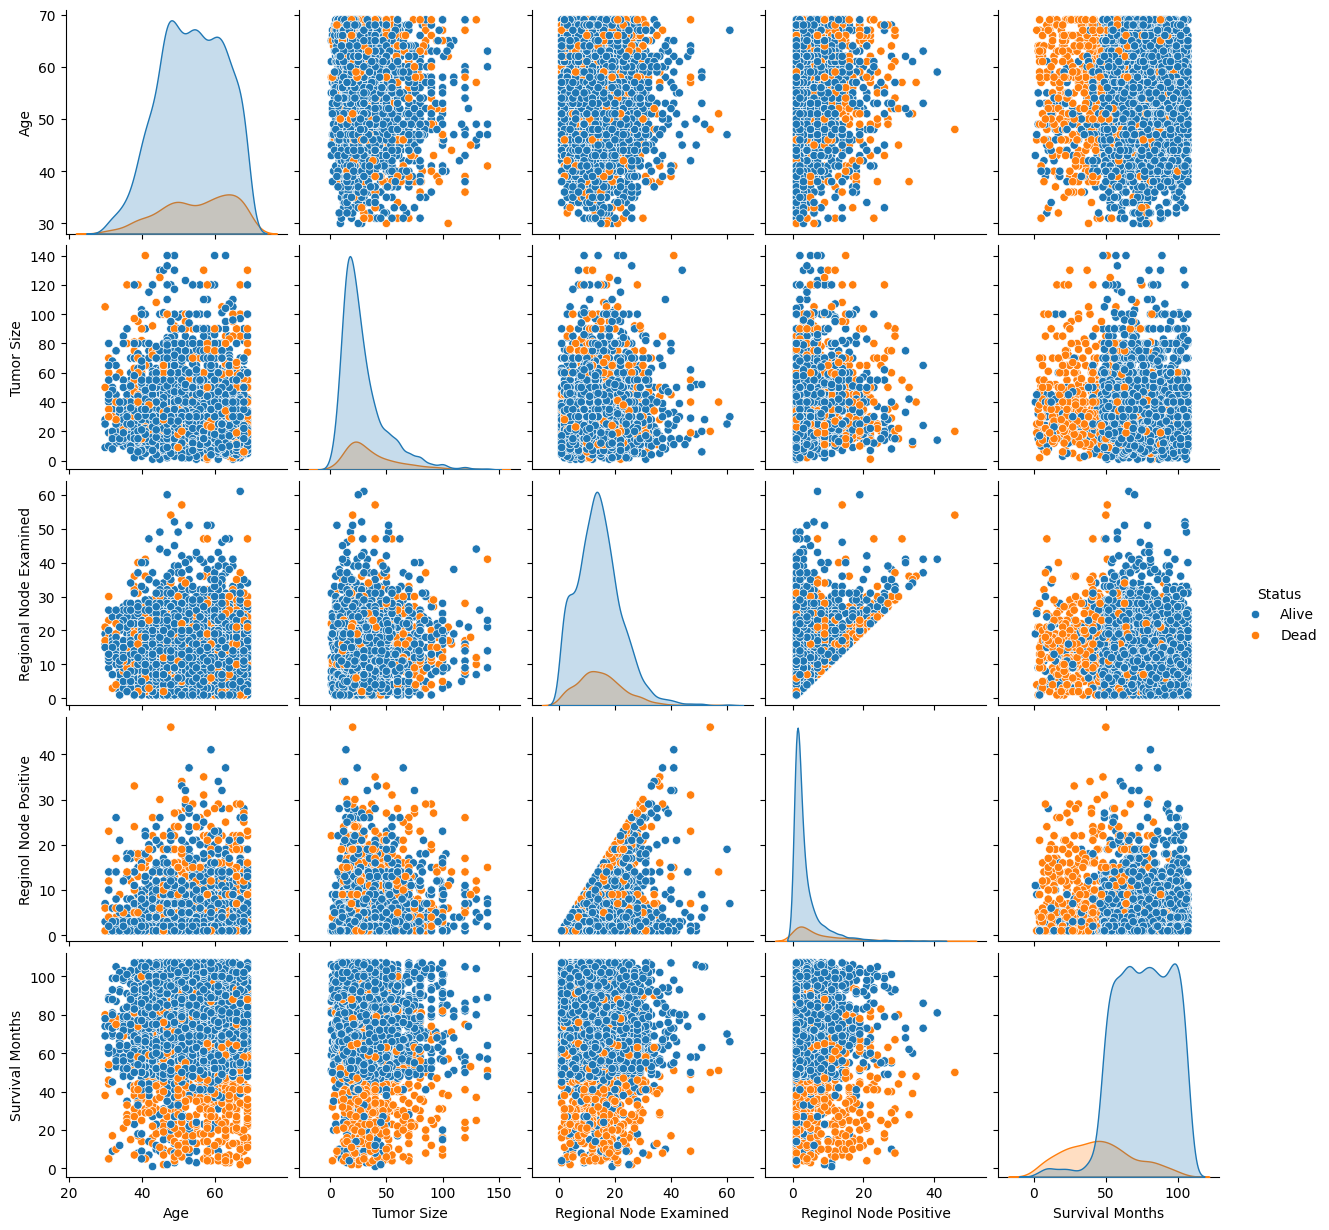

In [ ]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='Status')
plt.show()

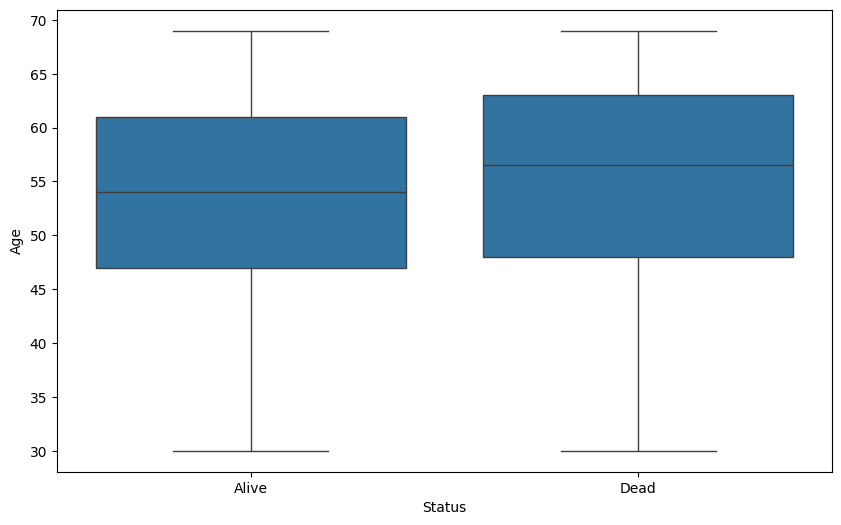

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Age', data=df)
plt.show()

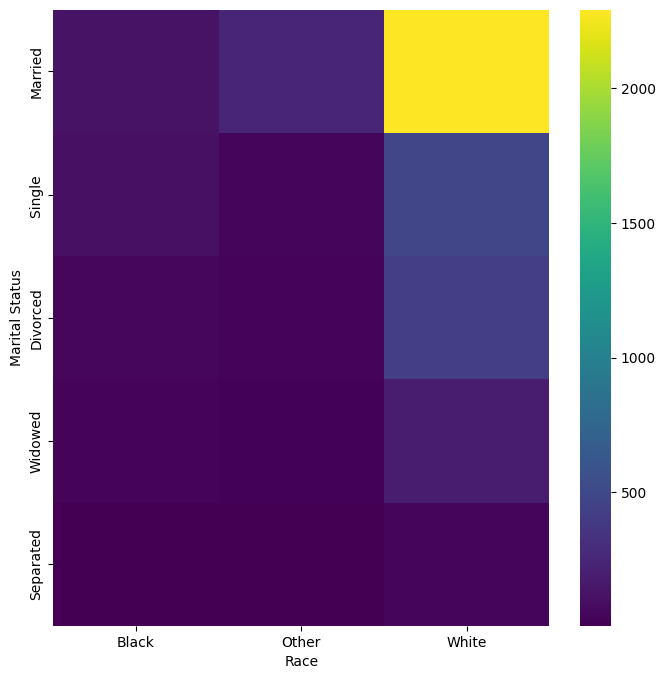

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Marital Status'].value_counts()
    for x_label, grp in df.groupby('Race')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Race')
_ = plt.ylabel('Marital Status')

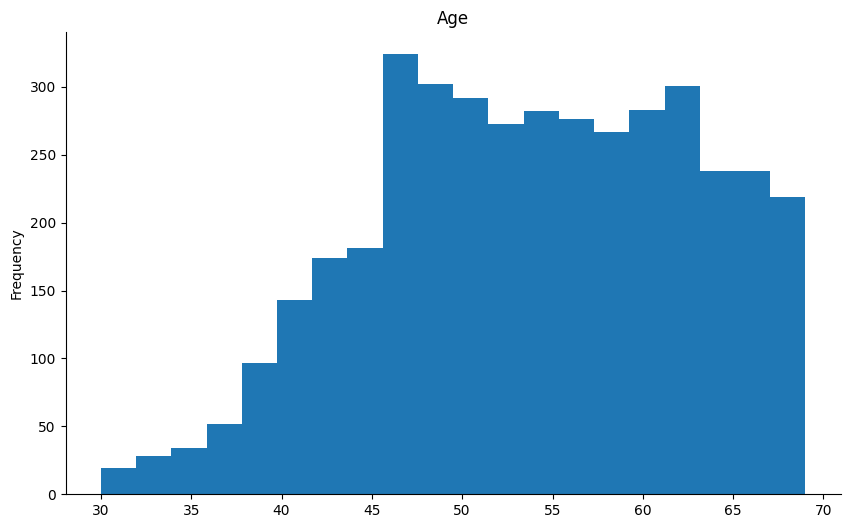

In [ ]:
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

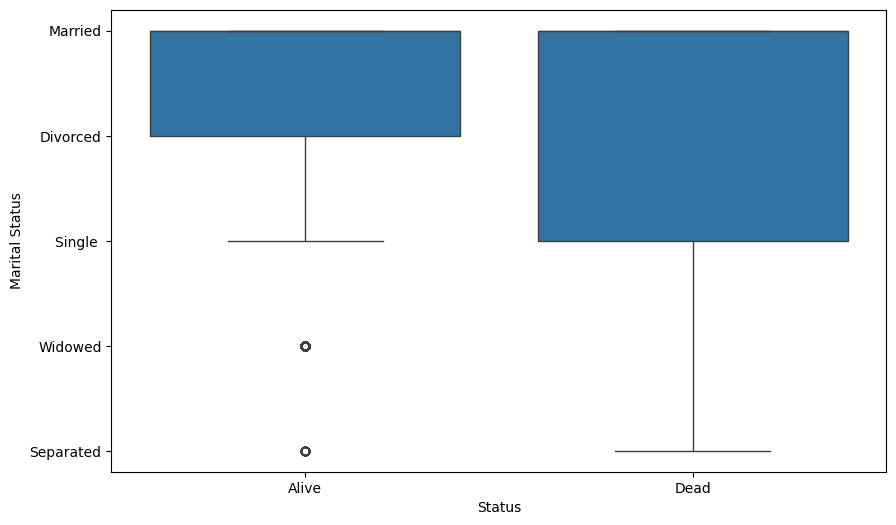

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Marital Status', data=df)
plt.show()

<Figure size 1000x600 with 0 Axes>

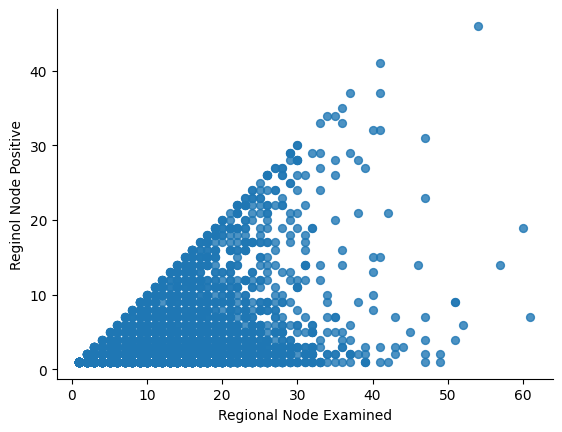

In [ ]:
plt.figure(figsize=(10, 6))
df.plot(kind='scatter', x='Regional Node Examined', y='Reginol Node Positive', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Figure size 1000x600 with 0 Axes>

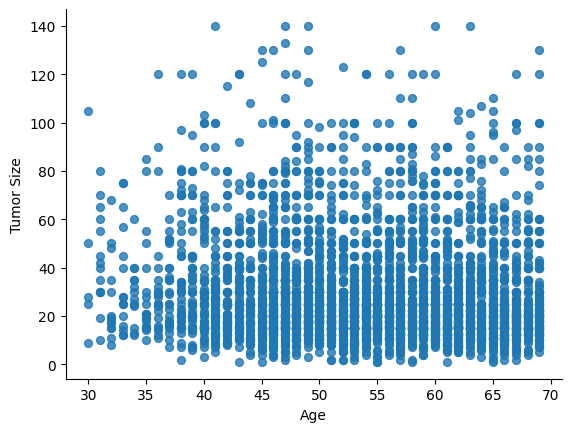

In [ ]:
plt.figure(figsize=(10, 6))
df.plot(kind='scatter', x='Age', y='Tumor Size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers

In [ ]:
x = df.drop(columns=['Status'], axis = 1)
y = df['Status']

In [ ]:
ohe = OneHotEncoder()
x = ohe.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3218, 383)
(805, 383)
(3218,)
(805,)


In [ ]:
mm = MaxAbsScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [ ]:
models = {
    'lg': LogisticRegression(),
    'dt': DecisionTreeClassifier(),
    'rf': RandomForestClassifier(),
    'knn': KNeighborsClassifier(),
    'svm': SVC(),
    'ada': AdaBoostClassifier(),
    'gb': GradientBoostingClassifier(),
    'ln': LinearSVC()
}

In [ ]:
model_names = list(models.keys())
accuracies = []
for model_name in model_names:
    model = models[model_name]
    if hasattr(x_train, 'toarray'):
        x_train_dense = x_train.toarray()
    else:
        x_train_dense = x_train

    model.fit(x_train_dense, y_train)
    if hasattr(x_test, 'toarray'):
        x_test_dense = x_test.toarray()
    else:
        x_test_dense = x_test

    y_pred = model.predict(x_test_dense)

    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)
    print(f'{model_name} Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('_'*80)

lg Accuracy: 90.6832298136646
              precision    recall  f1-score   support

       Alive       0.91      0.99      0.95       678
        Dead       0.87      0.48      0.62       127

    accuracy                           0.91       805
   macro avg       0.89      0.73      0.78       805
weighted avg       0.90      0.91      0.90       805

[[669   9]
 [ 66  61]]
________________________________________________________________________________
dt Accuracy: 83.60248447204968
              precision    recall  f1-score   support

       Alive       0.89      0.92      0.90       678
        Dead       0.48      0.40      0.44       127

    accuracy                           0.84       805
   macro avg       0.68      0.66      0.67       805
weighted avg       0.83      0.84      0.83       805

[[622  56]
 [ 76  51]]
________________________________________________________________________________
rf Accuracy: 86.08695652173914
              precision    recall  f1-score   

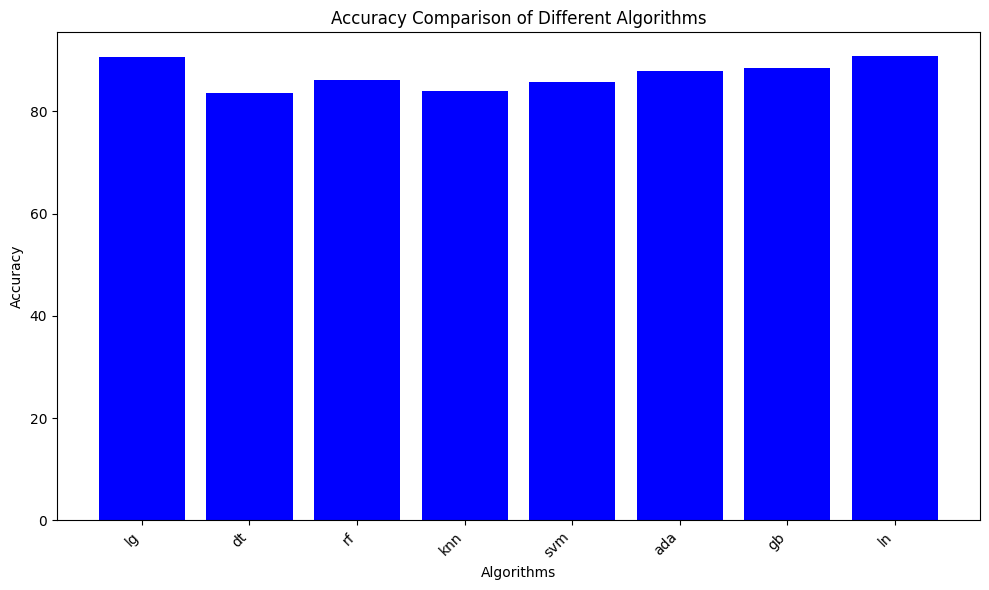

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='blue')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Algorithms")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
input_data = df.iloc[[0]]
input_data = input_data.drop(columns=['Status'], axis=1)

In [ ]:
input_data_encoded = ohe.transform(input_data)
input_data_scaled = mm.transform(input_data_encoded)

In [ ]:
for model_name in model_names:
    model = models[model_name]
    if hasattr(input_data_scaled, 'toarray'):
        input_data_dense = input_data_scaled.toarray()
    else:
        input_data_dense = input_data_scaled
    prediction = model.predict(input_data_dense)
    print(f'{model_name} Prediction: {prediction[0]}')

lg Prediction: Alive
dt Prediction: Dead
rf Prediction: Dead
knn Prediction: Alive
svm Prediction: Alive
ada Prediction: Alive
gb Prediction: Alive
ln Prediction: Alive


In [ ]:
actual_status = df.iloc[0]['Status']
print(f'Actual Status: {actual_status}')

Actual Status: Alive


In [ ]:
if prediction[0] == actual_status:
    print(f'{model_name} predicted correctly!')
else:
    print(f'{model_name} predicted incorrectly.')

ln predicted correctly!
